In [37]:
# Импортируем библиотеки
import math
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# Задаем функцию

def func(x):
    return math.sin(x) + math.cos(4*x/5) + math.cos(x)

In [39]:
# Импортируем библиотеки

length = [9.1, 25.73]
n = 10000
length = np.linspace(*length, n)

In [40]:
# Функция для вычисления константы Липщица

def L(length):
    func_start = func(length[0])
    i0 = length[0]
    Lmax = 0
    for i in length[1:]:
        func_nt = func(i)
        L = abs(func_nt - func_start) / (i - i0)
        io = i
        func_start = func_nt
        if L > Lmax:
            Lmax = L
    return Lmax
L = L(length)


In [41]:
L

1.93838196293684

In [42]:
def g_func(length,z_const,L):
    return [func(z_const) - L * abs(i - z_const) for i in length]

g_list = g_func(length,length[0],L)

In [43]:
p_min = lambda length,g_list: length[g_list.index(min(g_list))]


In [44]:
def p_func(length,z_fix,g_list0,L):
    g_list1 = g_func(length,z_fix,L)
    p = []
    for i in range(len(g_list0)):
        p.append(max([g_list1[i],g_list0[i]]))
    return p

In [45]:
iterations = 3
def Piyavsky(length,L):
    global iterations
    g_func = lambda length,z_0,L: [func(z_0) - L * abs(i - z_0) for i in length]
    #Первая итерация
    z_0 = length[0]
    g_0 = g_func(length,z_0,L)
    z_1 = p_min(length,g_0)
    #Первая итерация
    p_previous = p_func(length,z_1,g_0,L)
    z_previous = p_min(length,p_previous)
    #Тертья итерация
    p_nt = p_func(length,z_previous,p_previous,L)
    z_nt = p_min(length,p_nt)
    convergence = lambda length,u,p : func(u) - p[list(length).index(u)]
    while convergence(length,z_nt,p_nt) > 0.0001:
        p_previous = p_nt
        z_previous = z_nt
        p_nt = p_func(length,z_previous,p_previous,L)
        z_nt = p_min(length,p_nt)
        iterations += 1
    return [func(z_nt),z_nt,p_nt]

In [46]:
result = Piyavsky(length,L)

In [47]:
print(f'  {iterations} итераций')

  132 итераций


In [48]:
brokelines = result[2]

In [49]:
x_min = result[1]
x_min

10.666702670267027

In [50]:
y_min = result[0]
y_min 

-1.8976939090702443

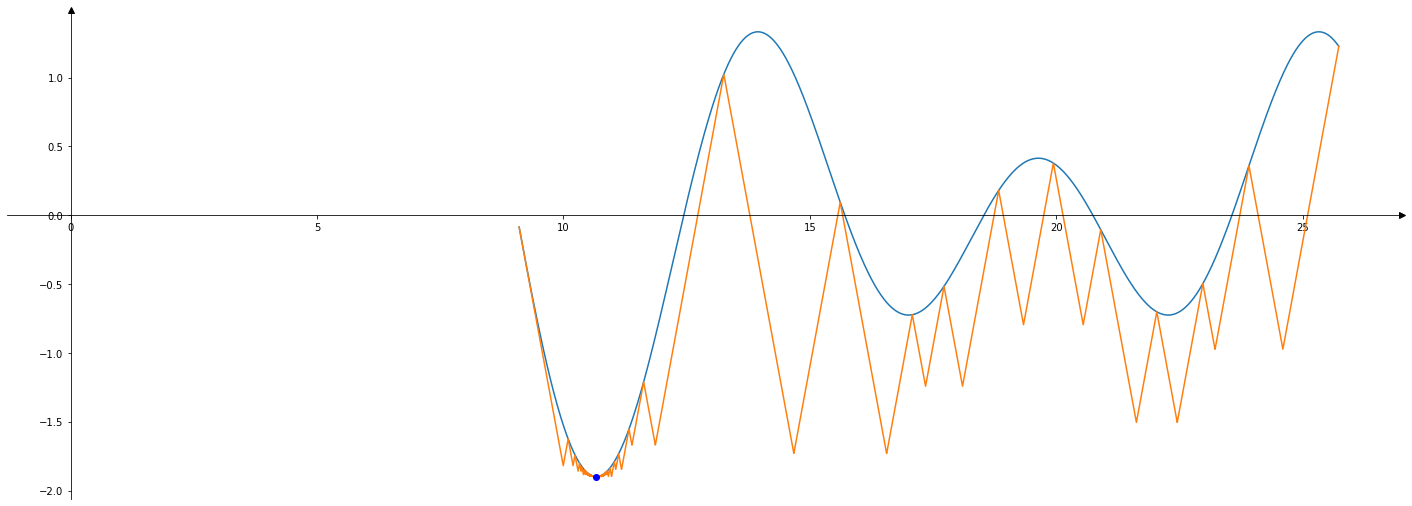

In [51]:
# Визуализация
graph = [func(x) for x in length]
fig, ax = plt.subplots(figsize=(25,9))
ax.spines["left"].set_position(("data", 0))
ax.spines["bottom"].set_position(("data", 0))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.plot(length, graph)
ax.plot(length,brokelines)
ax.plot(result[1],result[0],'bo')
plt.show()

In [52]:
z_0 = length[0]
g_func = lambda length,z_0,L: [func(z_0) - L * abs(i - z_0) for i in length]
g_0 = g_func(length,z_0,L)
u1 = p_min(length,g_0)
p_1 = p_func(length,u1,g_0,L)
z_nt = p_min(length,p_1)
p_2 = p_func(length,z_nt,p_1,L)
z_nt2 = p_min(length,p_2)
p_3 = p_func(length,z_nt2,p_2,L)
z_nt3 = p_min(length,p_3)
p_4 = p_func(length,z_nt3,p_3,L)
z_nt4 = p_min(length,p_4)

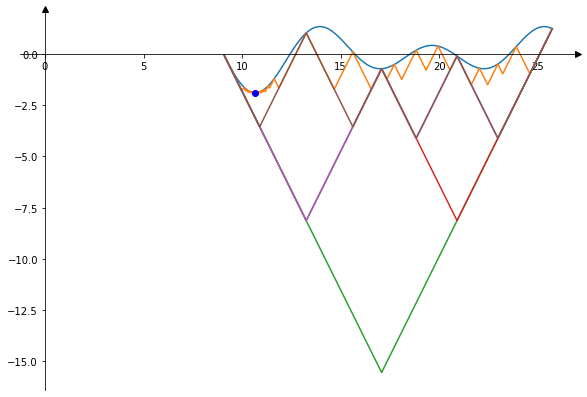

In [53]:
# Визуализация
graph = [func(x) for x in length]
fig, ax = plt.subplots(figsize=(10,7))
ax.spines["left"].set_position(("data", 0))
ax.spines["bottom"].set_position(("data", 0))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.plot(length, graph)
ax.plot(length,brokelines)
ax.plot(result[1],result[0],'bo')
ax.plot(length,p_1)
ax.plot(length,p_2)
ax.plot(length,p_3)
ax.plot(length,p_4)
plt.show()